# Machine Learning Assignment 3
### Elisa Klunder(s5190940), Mihkel Mariusz Jezierski (s4787730), Aksel Joonas Reedi (s4790820)

# Assignment 3: Introduction to Machine Learning (WBAI056-2023)

## Part I - Curse of Dimensionality
**Maximum obtainable points: 10**

1. **Examples of the Curse of Dimensionality:**
   - Provide two real or conceptual examples that demonstrate the curse of dimensionality. These examples can be original or sourced from the internet. If sourced, you must cite and quote the example.
   
2. **Argumentation:**
   - Explain why each of the two examples is a valid case of the curse of dimensionality.

## Part II - Cursed Featureless Birds
**Maximum obtainable points: 10**

You have a dataset that represents types of birds, consisting of 150 features and 100 data points. Your task is to categorize the bird types using a clustering method (such as k-means or DBSCAN).

1. **Steps to Consider:**
   - **Option 1:** Apply dimensionality reduction and then attempt to cluster the principal components.
   - **Option 2:** Apply clustering directly on the raw data.

2. **Reasoning:**
   - Explain your reasoning and the potential issues for each of the two steps.
   - Determine which step makes more sense based on the knowledge gained from the Unsupervised Learning lecture.

## Part III - Fun with Dimensionality Reduction
**Maximum obtainable points: 20**

1. **Dataset Selection:**
   - Choose one of the following datasets from this [link to scikit-learn datasets](https://scikit-learn.org/stable/datasets.html):
     - California housing
     - Olivetti faces
     - Breast cancer
     - Linnerrud
     - Diabetes
     - Digits
     - Iris
     - Wine recognition

   - Ideally, different groups should choose different datasets. Your choice does not affect your grade, and it does not need to relate to the dataset chosen in the previous assignment.

2. **Dimensionality Reduction:**
   - Discard the labels (the y array) and use only the features (x).
   - Apply t-SNE and Multi-Dimensional Scaling (MDS) from scikit-learn to reduce the dimensionality of your dataset to two or three dimensions (choose one dimension for all comparisons).
   - Compare the structures obtained using t-SNE and MDS.

3. **Autoencoder Training:**
   - Train an autoencoder on your data with a two or three-dimensional code/feature (same as chosen for t-SNE and MDS).
   - Compare the structure obtained with the autoencoder to the structures obtained with t-SNE and MDS.
   - Ensure proper training, including data normalization and testing for overfitting.

   - You can use libraries like Keras and PyTorch. Examples are available at:
     - [Keras Autoencoder Example](https://blog.keras.io/building-autoencoders-in-keras.html)
     - [PyTorch Autoencoder Example](https://lightning.ai/docs/pytorch/stable/notebooks/course_UvA-DL/08-deep-autoencoders.html)

   - Remember to cite any code not originally created by you.

4. **Visual Comparison:**
   - Provide three plots: one for each method (t-SNE, MDS, and Autoencoder).
   - Visually describe and compare the structure obtained in each case.
   - Conclude which algorithm (t-SNE, MDS, or Autoencoder) better describes the features of the selected dataset.

# Part I

**Real life case:**

Imagine a large e-commerce platform like Amazon. This platform aims to recommend products or content to users based on their preferences and behavior. To do this, they often rely on collaborative filtering. This works by identifying users who are similar to a target user and recommending items that those similar users have liked or interacted with. This similarity can be  calculated from the distance between users in a high-dimensional space, where each dimension represents a different aspect or feature of user behavior.

 RadIsad ovanovic et. al pointed out in [their paper](https://www.jmlr.org/papers/volume11/radovanovic10a/radovanovic10a.pdf) that “As dimensionality increases, the distribution of k-occurrences becomes considerably skewed, causing the emergence of hubs, or points with very high k-occurrences which effectively represent "popular" nearest neighbours. This phenomenon can lead to a loss of accuracy and efficiency in k-nearest-neighbors algorithms and other machine learning tasks that rely on measuring distances.”

Explanation for our case: In this high-dimensional space, hubness can emerge. Some users may become hubs because they are "popular" nearest neighbors to a large number of other users. These hub users have interacted with a wide range of products or content, and their profiles have high k-occurrences, meaning they are frequently appearing in the nearest neighbor lists of other users.

**Conceptual case:**

Imagine that we want to build a model that would classify movies by their genres using the K nearest neighbour algorithm. A curse of dimesionality problem arises when the number of considered features (e.g., movie length, budget etc.) becomes extremely large and unique to specific samples (for example, a feature that indicates explosions per minute - one action movie could have a lot of explosions while another focus more on chasing. As the number of these features grows (hence the number of dimesions), the data becomes sparser and sparser and with this the correct classification  becomes exponentially harder (and the generalisation weaker).

Explanation:

When the number of dimensions increases, the volume represented by that space increases exponentially. Then data points become sparse and generalisation becomes harder because a function to represent the data is harder to find if data is spread out a lot.

Sometimes the available training samples may not have observed targets for all combinations of the features. This is because some combination occure more often than others in real life. Due to this, the training samples available for building the model may not capture all possible combinations. Training a model with sparse data could lead to high-variance or overfitting conditions. This is because while training the model, the model has learnt from the frequently occurring combinations of the attributes and can predict the outcome accurately. When less frequently occurring combinations are fed to the model, it may not predict the outcome accurately. (from [Great Learning blog](https://www.mygreatlearning.com/blog/understanding-curse-of-dimensionality/#data-sparsity))



# Part II
Case 1: applying dimensionality reduction and then clustering the principal component.
1. How we would proceed:
In this case we would first apply dimentionality reduction. Since there is a lot of features to choose from, manually selecting important features by reasoning alone would be long and complicated. We could instead use Principal Component Analysis (PCA) to automatically select the features that would allow us to retain the most variance in our data sample while reducing the amount of features. This would help in simplifying the dataset and could improve the clustering process. The reason for this is that retaining only the features that explain the most variance in the data can lead to more meaningful clusters and prevent overfitting. Furthermore, it is for sure computationally less intensive and can lead to faster convergence in the clustering process.
2. Possible issues:
Choosing the correct number of features to keep can be complex, since this might influence the result of the clustering. Furthermore, the way we select which features to keep can also have a big impact on the meaningfulness of our data: if for example we select features using PCA, it could be that some of the features with high variance wouldn't be meaningful features for bird classification, while other features with lower variance would've been more meaningful. This means that by applying dimensionality reduction we could lose meaningful information.

Case 2: applying clustering directly on the raw data.

1. How we would proceed: In this case we would directly apply clustering (for example k-means or DBSCAN) on the raw data. This would allow us to take into account all available information that is encoded in the features. Not reducing dimensionality could be useful if for example all the features were relevant for identifying birds. Moreover, clustering with the raw data would ensure that we don't lose any complexity and meaningfulness of the data, by capturing complex relationships between features that might be lost in dimensionality reduction.
2. Possible issues: First of all, working with data in a high-dimensional space can be very computationally expensive, which in real-life applications usually is a big problem. The amount of data points we have (100) are not enough for meaningfully covering a space with 150 features. This disparity between data points and features would lead to the data points become sparse, and this can negatively impact the performance of the model. Finally, having more dimensions than data points can lead to potentially less meaningful clusters and overfitting, which means the model will not be able to generalize.

The procedure that in our opinion would make more sense for this case is the first one, which applies dimensionality reduction before clustering. The main reason for this is that we don't have enough data points to support such a higly dimensional space, so we most probably would need to apply dimensionality reduction before proceeding with clustering.


# Part III

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE, MDS

## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms

# Seed
torch.manual_seed(42)

# check if we can use GPU
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print("Device:", device)

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

Device: cpu


We decided to:
* use the Digits dataset
* reduce the dimensionality of the dataset to two dimensions

In [ ]:
# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)
digits = datasets.load_digits()
X.shape

(1797, 64)

<Figure size 640x480 with 0 Axes>

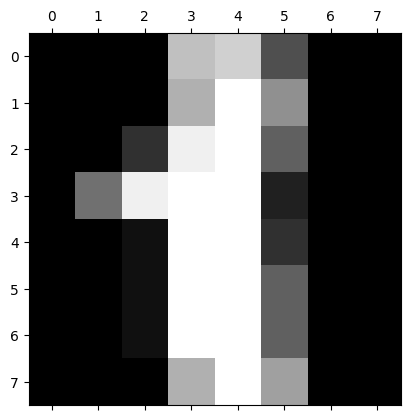

In [ ]:
# Show an example of the data
plt.gray()
plt.matshow(digits.images[1])
plt.show()

Before proceeding with splitting and normalizing the data, we want to provide a quick explanation of our design choices:

* We will split the data into train, test and validation set. This would not be necessary for the tSNE and MDS methods, since we just want to apply dimensionality reduction. However, it is good practice to have both a test and a validation set to train the autoencoder and check it for overfitting. For this reason, to keep the comparison between the three different methods consistent, we decided to apply tSNE and MDS only on the test set too. This way the final structure comparison will be made on the same exact data.

* The values "test_size=0.25" and "test_size=0.33" are set this way to make the test and validation sets roughly equal in size, since this is the common practice.

In [ ]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [ ]:
# Split train data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.33, stratify=y_train, random_state=42
)

scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

## tSNE

In [ ]:
# Perform dimensionality reduction with tSNE
X_TSNE = TSNE().fit_transform(X_test)
X_TSNE.shape

(450, 2)

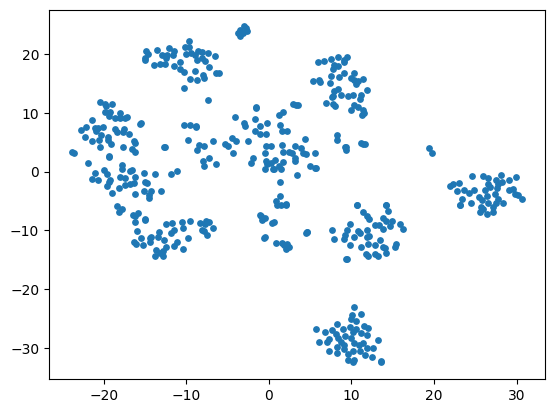

In [ ]:
# Show 2D plot
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], s=15)

## MDS

In [ ]:
# Perform dimensionality reduction with MDS
X_MDS = MDS(n_components=2).fit_transform(X_test)
X_MDS.shape

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(450, 2)

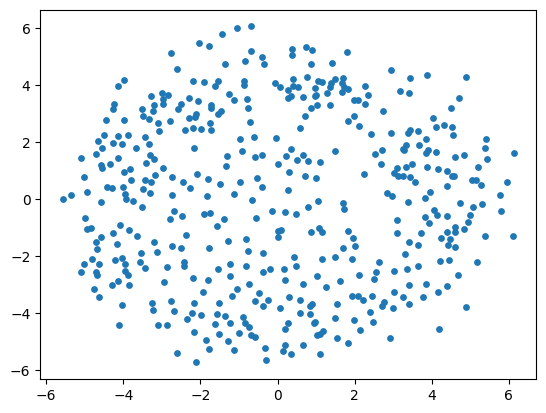

In [ ]:
# Show 2D plot
plt.scatter(X_MDS[:, 0], X_MDS[:, 1], s=15)

## Comparison between tSNE and MDS


After having performed dimensionality reduction with both methods, we can look at the differences in the scatterplots.  First of all, the range of the features differs a lot: while for tSNE features range from -30 to 30 on both axes, for MDS this range is instead from -6 to 6, also on both axes. Furthermore, and most importantly, the structure obtained by tSNE shows a much more pronounced clustering tendency compared to MDS, which instead shows a more uniform distribution.

## Autoencoder

In [ ]:
# Turning the data into tensors for pyTorch
X_train = torch.FloatTensor(X_train)
X_val = torch.FloatTensor(X_val)
X_test = torch.FloatTensor(X_test)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=X_train,
                                          batch_size=X_train.shape[0],
                                          shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=X_val,
                                          batch_size=X_val.shape[0],
                                          shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=X_test,
                                          batch_size=X_test.shape[0],
                                          shuffle=False)

In [ ]:
# Encoder
class Encoder(nn.Module):
  def __init__(self, act_fn : object = nn.GELU):
    super().__init__()
    c_hid = 8
    self.encoder = nn.Sequential(
        nn.Conv2d(1, c_hid, kernel_size=2, padding=0, stride=2), # from 8x8 to 4x4
        act_fn(),
        nn.Conv2d(c_hid, 2*c_hid, kernel_size=2, padding=0, stride=2), # from 4x4 to 2x2
        act_fn(),
        nn.Flatten(), # From grid to single feature vector
        nn.Linear(4*2*c_hid, 2) # from 4 dimensions to 2 dimensions
      )

  def forward(self, x):
        return self.encoder(x)

In [ ]:
# Decoder
class Decoder(nn.Module):

  def __init__(self, act_fn : object = nn.GELU):
    super().__init__()
    c_hid = 8
    self.linear = nn.Sequential(
            nn.Linear(2, 2*4*c_hid),
            act_fn()
        )
    self.decoder = nn.Sequential(
            nn.ConvTranspose2d(2*c_hid, c_hid, kernel_size=2, output_padding=0, padding=0, stride=2), # 2x2 => 4x4
            act_fn(),
            nn.ConvTranspose2d(c_hid, 1, kernel_size=2, output_padding=0, padding=0, stride=2), # 4x4 => 8x8
            nn.Tanh() # The input images is scaled between -1 and 1, hence the output has to be bounded as well
    )

  def forward(self, x):
      x = self.linear(x)
      x = x.reshape(x.shape[0], -1, 2, 2)
      x = self.decoder(x)
      return x

In [ ]:
# Putting encoder and decoder together in an autoencoder (AE)
class Autoencoder(nn.Module):
  def __init__(self, encoder_class : object = Encoder, decoder_class : object = Decoder):
          super().__init__()
          self.encoder = encoder_class()
          self.decoder = decoder_class()

  def forward(self, x):   # call for the autoencoder
      y = self.encoder(x)
      z = self.decoder(y)
      return z

  def forward_encoder(self, x):   # call only for the encoder part
      z = self.encoder(x)
      return z


In [ ]:
# Setting the model
model = Autoencoder()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters())

In [ ]:
# Training the autoencoder
num_epochs = 2000
outputs = []
outputs_val = []
for epoch in range(num_epochs):
  for image in train_loader:
    image = image.view(-1,1,8,8)

    #forward pass
    reconstructed = model.forward(image)
    loss = loss_function(reconstructed, image)

    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if epoch % 100 == 0: #test the model against the validation set
    for image_val in val_loader:
        image_val = image_val.view(-1,1,8,8)

        reconstructed_val = model.forward(image_val)
        loss_val = loss_function(reconstructed_val, image_val)
        outputs.append((epoch, image, reconstructed, loss.item()))
        outputs_val.append((epoch, image_val, reconstructed_val, loss_val.item()))

    print(f"epoch: {epoch}, train loss: {loss.item():.4f}, validation loss: {loss_val.item():.4f}")

epoch: 0, train loss: 0.5766, validation loss: 0.5753
epoch: 100, train loss: 0.3322, validation loss: 0.3349
epoch: 200, train loss: 0.2753, validation loss: 0.2809
epoch: 300, train loss: 0.2526, validation loss: 0.2590
epoch: 400, train loss: 0.2351, validation loss: 0.2415
epoch: 500, train loss: 0.2161, validation loss: 0.2223
epoch: 600, train loss: 0.2041, validation loss: 0.2112
epoch: 700, train loss: 0.1961, validation loss: 0.2040
epoch: 800, train loss: 0.1908, validation loss: 0.1997
epoch: 900, train loss: 0.1863, validation loss: 0.1961
epoch: 1000, train loss: 0.1818, validation loss: 0.1928
epoch: 1100, train loss: 0.1775, validation loss: 0.1897
epoch: 1200, train loss: 0.1739, validation loss: 0.1874
epoch: 1300, train loss: 0.1705, validation loss: 0.1859
epoch: 1400, train loss: 0.1673, validation loss: 0.1843
epoch: 1500, train loss: 0.1644, validation loss: 0.1833
epoch: 1600, train loss: 0.1617, validation loss: 0.1821
epoch: 1700, train loss: 0.1590, validation

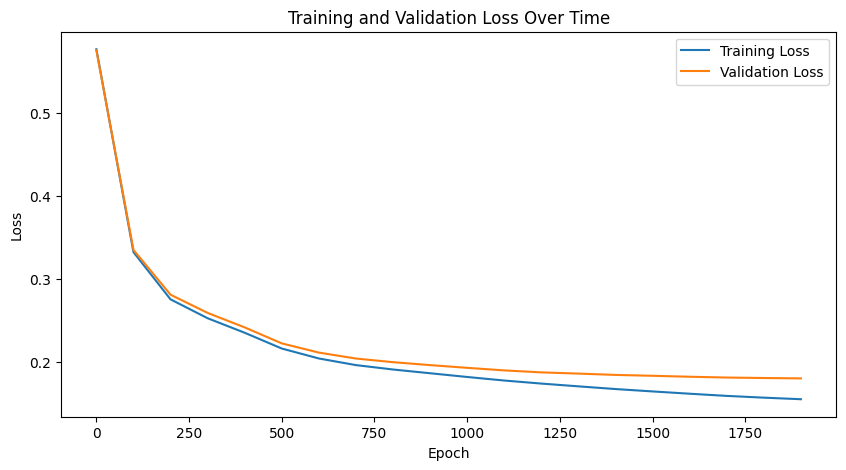

In [ ]:
# Plotting validation loss to check for overfitting
train_loss = [outputs[int(epoch/100)][3] for epoch in range(0, num_epochs, 100)]
val_loss = [outputs_val[int(epoch/100)][3] for epoch in range(0, num_epochs, 100)]
epochs = range(0, num_epochs, 100)
plt.figure(figsize=(10, 5))

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Time')
plt.show()

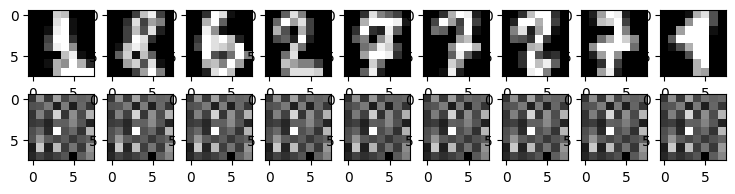

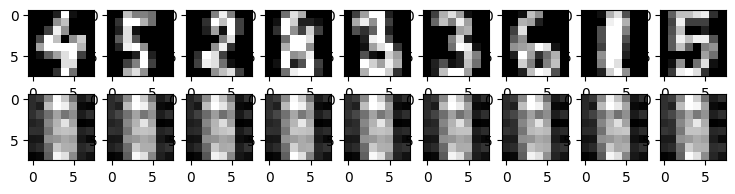

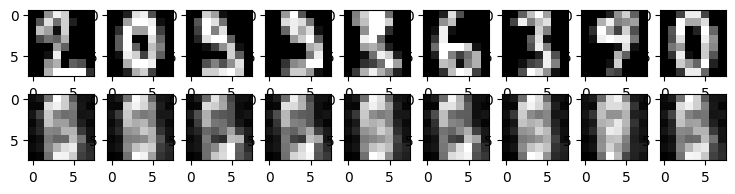

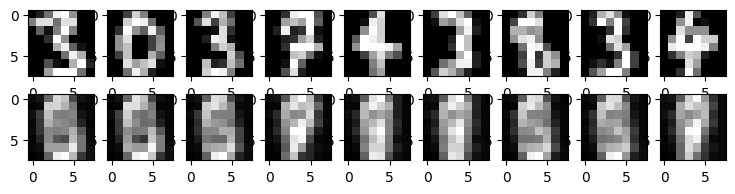

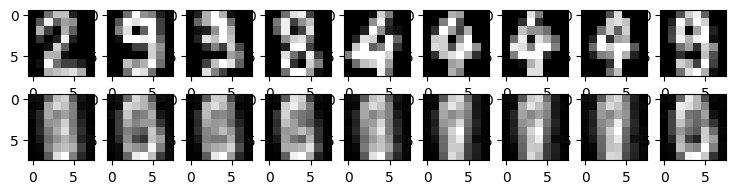

In [ ]:
# Plotting the visual working of the autoencoder
for k in range(0, num_epochs, 400):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[int(k/400)][1].detach().numpy()
    recon = outputs[int(k/400)][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        plt.imshow(item[0])

## Checking encoding properites of the autoencoder

In [ ]:
# Reshaping the images
for image in test_loader:
  image = image.view(-1,1,8,8)
  reconstructed_test = model.forward_encoder(image)

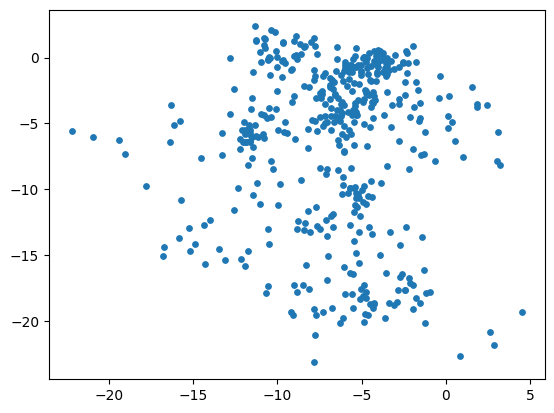

In [ ]:
# Plotting the encoded features
plot_data = reconstructed_test.detach().numpy()
plt.scatter(plot_data[:,0], plot_data[:,1], s=15)
plt.show()

## Final Comparison

###tSNE scatterplot

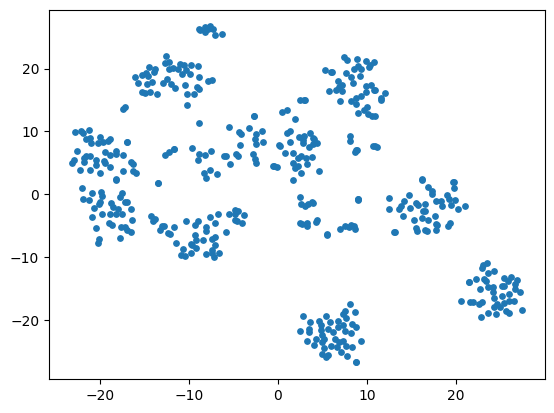

###MDS scatterplot

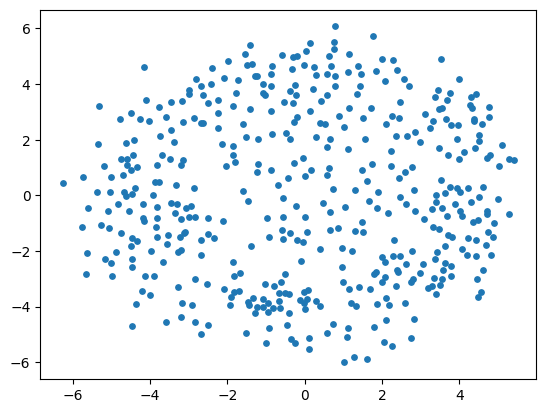

### AE scatterplot

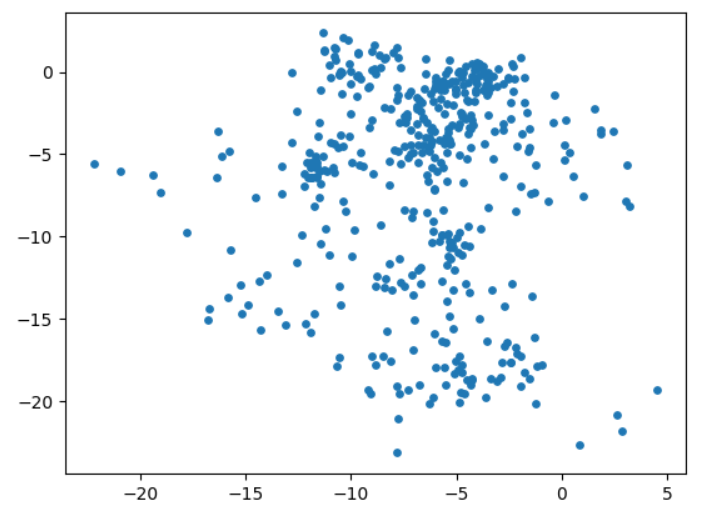

The first important difference to note between these three scatterplot is the range of the features: in the tSNE plot the features range between -30 and 30 on both axes, while for MDS both features range -6 and 6, and finally for the AE plot both features range from -30 to 5.

Furthermore, we can see that the three plots vary a lot also in the shape of the distribution of the data points. In the tSNE plot we can identify some clear clusters. Even though not all clusters can be distinguished with certainty, the overall clustering tendency is apparent. On the other hand, the data points in the MDS plot can’t be assigned at first glance to any distinguishable clusters. They appear to be more or less uniformly distributed across the feature space. Finally, similarly to MDS, the plot for the autoencoder doesn't show clear clustering. However, the datapoints are not as uniformally distributed as in the MDS plot. They appear to be more concentrated in certain areas of the feature space and more sparse in other areas.

In conclusion, applying these three different methods for dimensionality reduction results in vastly different plot distributions. The structure that most clearly shows meaningful clusters (ideally corresponding to the different labels in the dataset) is the one produced by tSNE, so we think this is the structure that better helps us visualize the selected dataset features.